In [3]:
import pandas as pd
import os
import webbrowser

from jinja2 import Template
from dotenv import load_dotenv

import importlib
import reporting_queries
import reporting_plots
# import pdfkit
import matplotlib.pyplot as plt

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage


importlib.reload(reporting_queries)
importlib.reload(reporting_plots)

from reporting_config import *
from reporting_queries import (run_sql_query, get_test_count, get_dl_5g_curr_comp, 
                               get_network_category_curr_comp, get_test_summary_curr_comp, 
                               get_country, get_previous_csid)
from reporting_plots import create_facet_grid, plot_with_summary_lines, plot_dl_5g_network_category
from reporting_eom_tables import process_eom_data

load_dotenv(dotenv_path="/path/to/.env")


# Retrieve credentials
# email_user = os.getenv("SES_USER")
# email_password = os.getenv("SES_PWD")

# print(f"Email User: {email_user}")
# print(f"Email Password: {email_password}")

False

                                                                    Input needed:
Required:

Current Collection Set ID --> add to the variable: curr_csid

Optional:

* Link to the DQ Jira ticket --> add to the variable: link_jira_ticket
    - if you would like to break the paragraph in a bullet point, add two dots and a space (.. )
    - if you don't create bullets, the paragraphs will automatically fill the page, adjusting to the established width.
    - If no link is provided, keep the variable as an empty string ("")

* Comments for variables: Add comments to notable_insights, other_observations, and data_exclusion.
    - If no comment is provided for a variable, keep it as an empty string ("")

In [4]:
# country = "US"
# CorpusChristi-TX
# curr_csid = 12705
# comp_csid = 12381
# link_jira_ticket = "http://ooklanm.atlassian.net/jira/software/c/projects/RDAQ/issues/RDAQ-5620"


# country = "UK"
#London
curr_csid = 12854
# comp_csid = 12265
link_jira_ticket = "https://ooklanm.atlassian.net/jira/software/c/projects/RDAQ/issues/RDAQ-5736"


# Add two dots and space to have a new bullet paragraph (.. )

notable_insights = ("Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt... "
"Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat... "
"Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur... Excepteur sint occaecat cupidatat n"
"on proident, sunt in culpa qui officia deserunt mollit anim id est laborum.")
other_observations = ("Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, " \
"eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit " \
"aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt. Neque porro quisquam est, " \
"qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam " \
"aliquam quaerat voluptatem.")
data_exclusion = ("")


# link_jira_ticket = ""
# notable_insights = ("")
# other_observations = ("")
# data_exclusion = ("")

last_five_chars = link_jira_ticket[-5:]

notable_insights_list = notable_insights.split(".. ")
other_observations_list = other_observations.split(".. ")
data_exclusion_list = data_exclusion.split(".. ")


In [5]:
# Create the 'graphs' folder if it doesn't exist
graphs_folder = "graphs"
os.makedirs(graphs_folder, exist_ok=True)


# Fetch the data by calling the functions defined in reporting_queries.py
comp_csid = get_previous_csid(curr_csid)
country, test_type_id, num_col_wrap, test_type_id_str = get_country(curr_csid)
df_network_category_curr, df_network_category_comp = get_network_category_curr_comp(curr_csid, comp_csid)
df_ts_curr, df_ts_comp = get_test_summary_curr_comp(curr_csid, comp_csid)
df_test_count = get_test_count(curr_csid)
df_dl_5g_curr, df_dl_5g_comp = get_dl_5g_curr_comp(curr_csid, comp_csid)

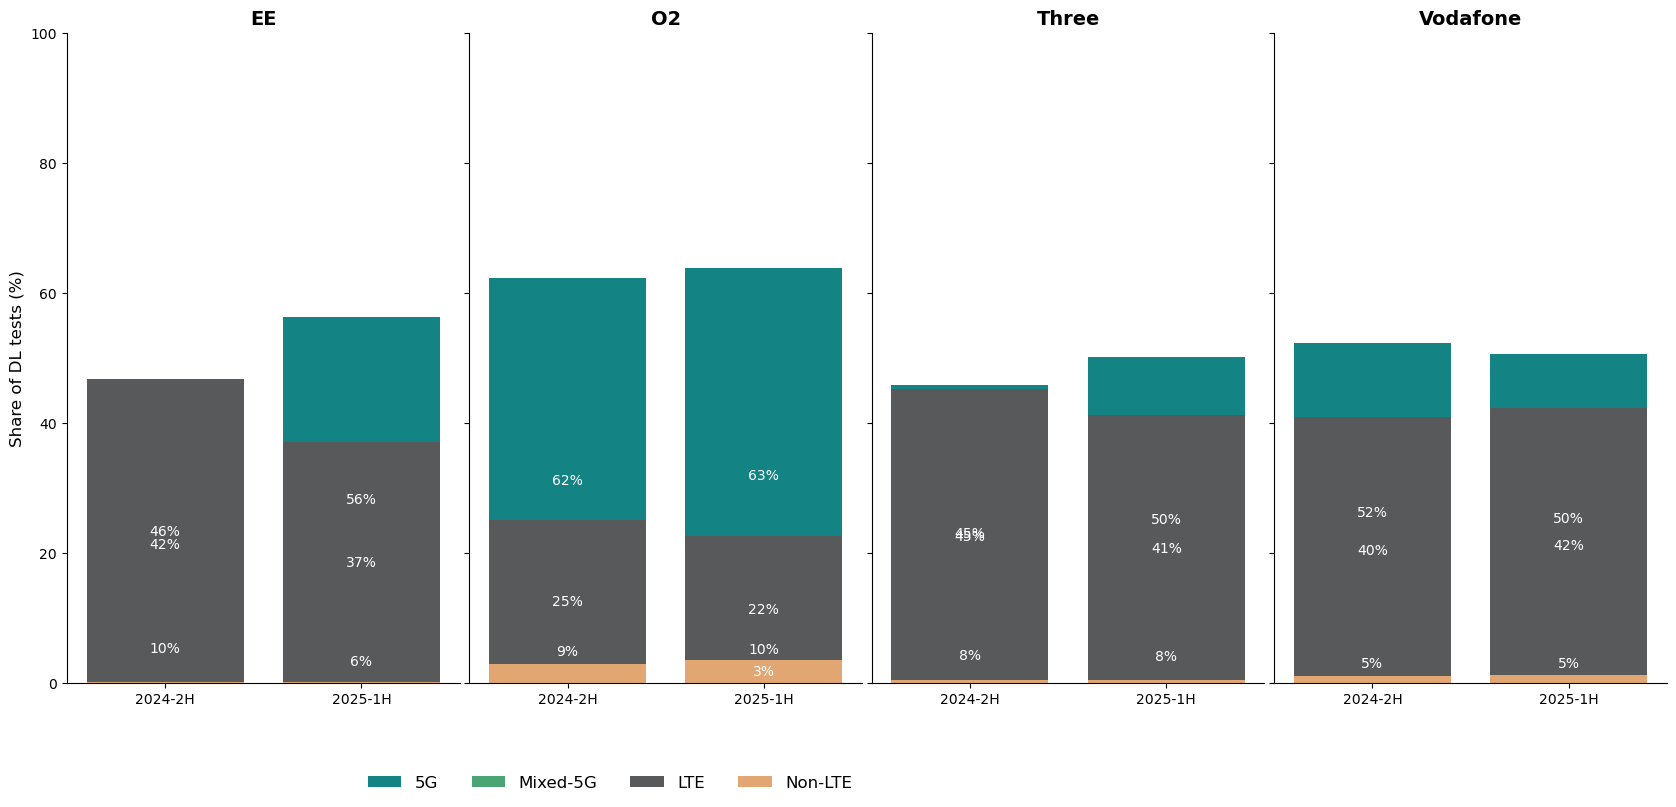

In [6]:

# Create plot by calling the functions defined in reporting_plots.py
plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path=os.path.join(graphs_folder, "dl_5g_network_category.png"))


In [7]:

df_dl_5g_curr.head(len(df_dl_5g_curr))

,product_period,carrier,dl_network,count,dl_pct,access_spd,med_tput,max_tput,burst_tput,access,task
0,2025-1H,EE,5G,1686,56.35,29.0,298.5,944.1,1036.8,100.0,100.0
1,2025-1H,EE,Mixed-5G,194,6.48,32.0,94.0,607.6,835.1,99.9,95.5
2,2025-1H,EE,LTE,1110,37.10,30.0,54.6,441.1,671.4,98.9,99.0
3,2025-1H,EE,Non-LTE,2,0.07,3099.0,2.8,2.8,9.8,31.3,33.3
4,2025-1H,O2,5G,1908,63.75,32.0,84.4,475.6,651.4,99.7,98.6
5,2025-1H,O2,Mixed-5G,303,10.12,40.0,16.3,211.4,342.2,97.3,91.4
6,2025-1H,O2,LTE,675,22.55,35.0,18.5,260.6,374.7,97.3,95.1
7,2025-1H,O2,Non-LTE,107,3.58,79.0,0.9,19.2,111.7,74.0,67.0
8,2025-1H,Three,5G,1502,50.20,19.0,243.6,1408.7,1477.9,100.0,99.9
9,2025-1H,Three,Mixed-5G,243,8.12,31.0,53.5,854.8,1214.6,99.6,95.9


Data Network Category filtered and reshape by network type

In [8]:
# Combine the current and comparison DataFrames
df_network_category_combined = pd.concat([df_network_category_curr, df_network_category_comp], ignore_index=True)

# Reshape the DataFrame
df_network_category_reshaped = df_network_category_combined.pivot_table(
    index=["product_period", "carrier"], 
    columns="network", 
    values="percent"
).reset_index()

# Remove the column index name
df_network_category_reshaped.columns.name = None  

# Sort by 'carrier'
df_network_category_reshaped = df_network_category_reshaped.sort_values(by="carrier").reset_index(drop=True)

# Reorder  the columns
df_network_category_reshaped = df_network_category_reshaped[['product_period', 'carrier', '5G', 'Mixed-5G', 'LTE']]

# Display the entire DataFrame
df_network_category_reshaped.head(len(df_network_category_reshaped))

,product_period,carrier,5G,Mixed-5G,LTE
0,2024-2H,EE,41.9,13.7,44.2
1,2025-1H,EE,54.4,8.8,36.7
2,2024-2H,O2,60.9,12.1,23.7
3,2025-1H,O2,61.4,12.2,22.5
4,2024-2H,Three,45.2,10.4,43.9
5,2025-1H,Three,48.0,10.9,40.8
6,2024-2H,Vodafone,51.2,8.0,39.6
7,2025-1H,Vodafone,50.6,8.8,39.4


 Download Network Technology

In [9]:
dl_lte_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
dl_lte_curr['start_date'] = pd.to_datetime(dl_lte_curr['local_time']).dt.date

dl_lte_comp = df_ts_comp [df_ts_comp ['test_type_id'] == 20]
dl_lte_comp['start_date'] = pd.to_datetime(dl_lte_comp['local_time']).dt.date


filtered_net_type_curr = (
    dl_lte_curr['net_types'].isin([262144, 4194304, 4456448]) & 
    dl_lte_curr['net_types_desc'].isin(["LTE", "Mixed", "5G", "NR", "LTE,NR"]))
   
filtered_net_type_comp = (
    dl_lte_comp['net_types'].isin([262144, 4194304, 4456448]) & 
    dl_lte_comp['net_types_desc'].isin(["LTE", "Mixed", "5G", "NR", "LTE,NR"])
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/1111104769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_lte_curr['start_date'] = pd.to_datetime(dl_lte_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/1111104769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_lte_comp['start_date'] = pd.to_datetime(dl_lte_comp['local_time']).dt.date


                                         DL LTE market Daily

Current:

In [10]:
lte_1 = (
    dl_lte_curr[filtered_net_type_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='lte_count') 
)

lte_2 = (
    dl_lte_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_curr = pd.merge(lte_1, lte_2, on=['carrier', 'start_date'], how='left').fillna(0)

lte_curr['lte_pct'] = round((lte_curr['lte_count'] / lte_curr['total_tests']) * 100, 2)

# lte_curr.head()

Comparison:

In [11]:
lte_3 = (
    dl_lte_comp[filtered_net_type_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='lte_count') 
)

lte_4 = (
    dl_lte_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_comp = pd.merge(lte_3, lte_4, on=['carrier', 'start_date'], how='left').fillna(0)

lte_comp['lte_pct'] = round((lte_comp['lte_count'] / lte_comp['total_tests']) * 100, 2)

# lte_comp.head()

DL LTE Overall

Current:

In [12]:
lte_5 = (
    dl_lte_curr[filtered_net_type_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='lte_count')
)

lte_6 = (
    dl_lte_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_all_curr = pd.merge(lte_5, lte_6, on=['carrier'], how='left').fillna(0)

lte_all_curr['mean_LTE_curr'] = round((lte_all_curr['lte_count'] / lte_all_curr['total_tests']) * 100, 2)

# lte_all_curr.head()

Comparison:

In [13]:
lte_7 = (
    dl_lte_comp[filtered_net_type_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='lte_count')
)

lte_8 = (
    dl_lte_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_all_comp = pd.merge(lte_7, lte_8, on=['carrier'], how='left').fillna(0)

lte_all_comp['mean_LTE_comp'] = round((lte_all_comp['lte_count'] / lte_all_comp['total_tests']) * 100, 2)

# lte_all_comp.head()

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


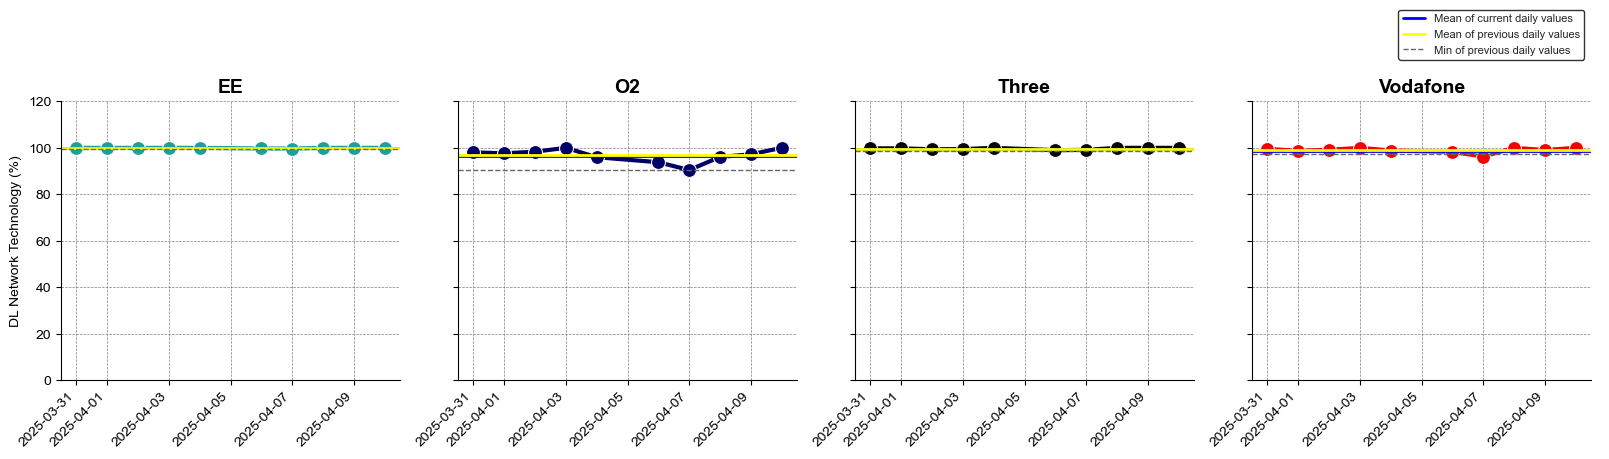

4


In [14]:
# Prepare the data for the function call
mean_curr_vals = lte_all_curr.groupby('carrier')['mean_LTE_curr'].mean().to_dict()
mean_comp_vals = lte_all_comp.groupby('carrier')['mean_LTE_comp'].mean().to_dict()
min_vals = lte_comp.groupby('carrier')['lte_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=lte_curr,
    y_col="lte_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    min_vals=min_vals,
    max_vals=None,
    y_label="DL Network Technology (%)",
    save_path=os.path.join(graphs_folder,"lte_graph.png")
)

print(num_col_wrap)


Compute the EOM table

In [15]:
curr_test = lte_all_curr
comp_test = lte_all_comp
on_column = 'carrier'
drop_columns = ['lte_count_x', 'lte_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'DL Network Technology (%)'
curr_col = 'mean_LTE_curr'
comp_col = 'mean_LTE_comp'

# Process the data
lte_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
lte_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Network Technology (%),EE,99.93,99.86,0.07,0.07
1,DL Network Technology (%),O2,96.39,97.10,-0.71,-0.73
2,DL Network Technology (%),Three,99.57,99.56,0.01,0.01
3,DL Network Technology (%),Vodafone,98.76,99.01,-0.25,-0.25


                                    M2M VoLTE/VoNR/EPS Fallback

In [16]:
call_data_curr = df_ts_curr[df_ts_curr['test_type_id'] == 23]
call_data_curr['start_date'] = pd.to_datetime(call_data_curr['local_time']).dt.date

filtered_call_net_type_curr = (
    call_data_curr['call_network_type'].isin(["VoLTE", "EPS Fallback", "VoNR"]) 
)

call_data_comp = df_ts_comp[df_ts_comp['test_type_id'] == 23]
call_data_comp['start_date'] = pd.to_datetime(call_data_comp['local_time']).dt.date

filtered_call_net_type_comp = (
    call_data_comp['call_network_type'].isin(["VoLTE", "EPS Fallback", "VoNR"]) 
)
# call_data_curr.head()

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/4060893198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['start_date'] = pd.to_datetime(call_data_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/4060893198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_comp['start_date'] = pd.to_datetime(call_data_comp['local_time']).dt.date


Current VoLTE:

In [17]:
volte_1 = (
    call_data_curr[filtered_call_net_type_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_2 = (
    call_data_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

volte_curr = pd.merge(volte_1, volte_2, on=['carrier', 'start_date'], how='left').fillna(0)

volte_curr['volte_pct'] = round((volte_curr['volte_count'] / volte_curr['total_tests']) * 100, 2)

# volte_curr.head()

Comparison VoLTE:

In [18]:
volte_3 = (
    call_data_comp[filtered_call_net_type_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_4 = (
    call_data_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

volte_comp = pd.merge(volte_3, volte_4, on=['carrier', 'start_date'], how='left').fillna(0)

volte_comp['volte_pct'] = round((volte_comp['volte_count'] / volte_comp['total_tests']) * 100, 2)

# volte_comp.head()

DL LTE Overall

Current:

In [19]:
volte_5 = (
    call_data_curr[filtered_call_net_type_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_6 = (
    call_data_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

volte_all_curr = pd.merge(volte_5, volte_6, on=['carrier'], how='left').fillna(0)

volte_all_curr['mean_voLTE_curr'] = round((volte_all_curr['volte_count'] / volte_all_curr['total_tests']) * 100, 2)

# volte_all_curr.head()

Comparison:

In [20]:
volte_7 = (
    call_data_comp[filtered_call_net_type_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_8 = (
    call_data_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

volte_all_comp = pd.merge(volte_7, volte_8, on=['carrier'], how='left').fillna(0)

volte_all_comp['mean_voLTE_comp'] = round((volte_all_comp['volte_count'] / volte_all_comp['total_tests']) * 100, 2)

# volte_all_comp.head()

PLOT GRAPH

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


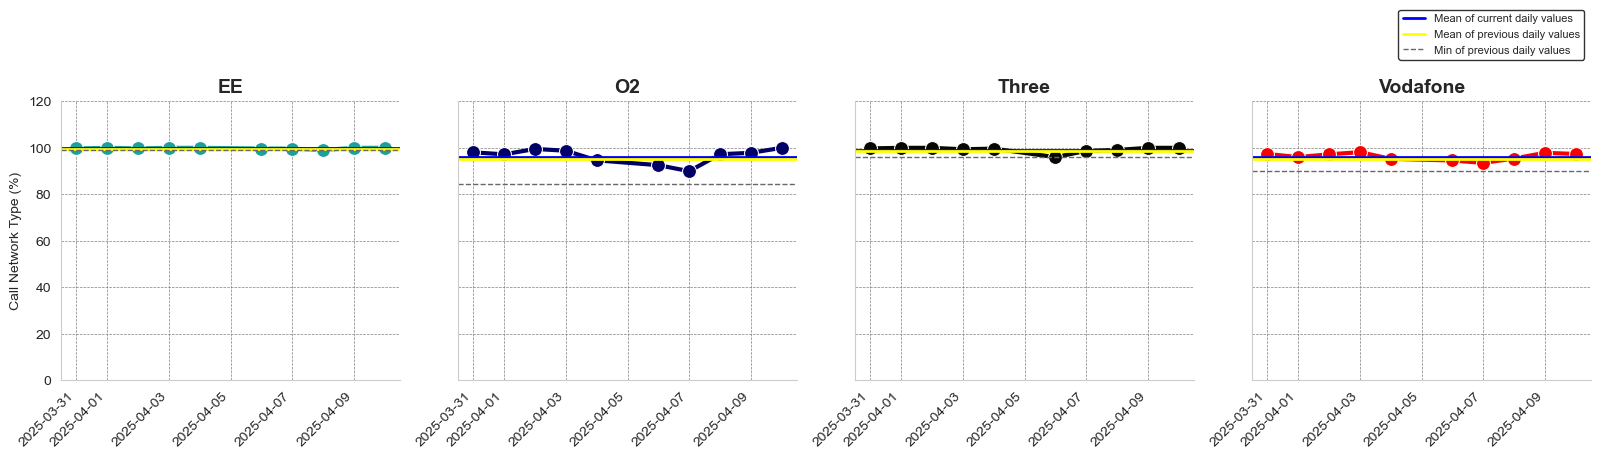

In [21]:
# Prepare the data for the function call
mean_curr_vals = volte_all_curr.groupby('carrier')['mean_voLTE_curr'].mean().to_dict()
mean_comp_vals = volte_all_comp.groupby('carrier')['mean_voLTE_comp'].mean().to_dict()
min_vals = volte_comp.groupby('carrier')['volte_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=volte_curr,
    y_col="volte_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    min_vals=min_vals,
    max_vals=None,
    # title="VoLTE/VoNR/EPS Fallback",
    y_label="Call Network Type (%)",
    save_path=os.path.join(graphs_folder,"volte_graph.png")
)

compute the EOM table

In [22]:
curr_test = volte_all_curr
comp_test = volte_all_comp
on_column = 'carrier'
drop_columns = ['volte_count_x', 'volte_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'Call Network Type (%)'
curr_col = 'mean_voLTE_curr'
comp_col = 'mean_voLTE_comp'

# Process the data
volte_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
volte_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,Call Network Type (%),EE,99.81,99.61,0.20,0.20
1,Call Network Type (%),O2,96.12,95.38,0.74,0.78
2,Call Network Type (%),Three,99.16,98.72,0.44,0.45
3,Call Network Type (%),Vodafone,96.04,95.07,0.97,1.02


                                    Mobile-to-Mobile Call Block

In [23]:
call_data_curr['blocked_call'] = 0
mask =(call_data_curr['flag_access_success'] == False)
call_data_curr.loc[mask, 'blocked_call'] = 1

filtered_call_block_curr = (
    call_data_curr['blocked_call'] == 1
)

call_data_comp['blocked_call'] = 0
mask =(call_data_comp['flag_access_success'] == False)
call_data_comp.loc[mask, 'blocked_call'] = 1

filtered_call_block_comp = (
    call_data_comp['blocked_call'] == 1
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2479447700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['blocked_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2479447700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_comp['blocked_call'] = 0


M2M Block Rate Current market Daily

In [24]:
blk_1 = (
    call_data_curr[filtered_call_block_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_2 = (
    call_data_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_curr = pd.merge(blk_1, blk_2, on=['carrier', 'start_date'], how='right').fillna(0)

block_curr['block_pct'] = round((block_curr['block_count'] / block_curr['total_tests']) * 100, 2)

block_curr = block_curr[['carrier', 'start_date', 'block_count', 'total_tests', 'block_pct']]

# block_curr.head(len(block_curr))

M2M Block Rate Comparison market Daily

In [25]:
blk_3 = (
    call_data_comp[filtered_call_block_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_4 = (
    call_data_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_comp = pd.merge(blk_3, blk_4, on=['carrier', 'start_date'], how='right').fillna(0)

block_comp['block_pct'] = round((block_comp['block_count'] / block_comp['total_tests']) * 100, 2)

block_comp = block_comp[['carrier', 'start_date', 'block_count', 'total_tests', 'block_pct']]

# block_comp.head()

  M2M Block Rate Overall

Current:

In [26]:
blk_5 = (
    call_data_curr[filtered_call_block_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_6 = (
    call_data_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_all_curr = pd.merge(blk_5, blk_6, on=['carrier'], how='right').fillna(0)

block_all_curr['block_rate_curr'] = round((block_all_curr['block_count'] / block_all_curr['total_tests']) * 100, 2)
# Reorder the columns
block_all_curr = block_all_curr[['carrier', 'block_count', 'total_tests', 'block_rate_curr']]

# block_all_curr.head()

Comparison:

In [27]:
blk_7 = (
    call_data_comp[filtered_call_block_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_8 = (
    call_data_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_all_comp = pd.merge(blk_7, blk_8, on=['carrier'], how='right').fillna(0)

block_all_comp['block_rate_comp'] = round((block_all_comp['block_count'] / block_all_comp['total_tests']) * 100, 2)
# Reorder the columns
block_all_comp = block_all_comp[['carrier', 'block_count', 'total_tests', 'block_rate_comp']]

# block_all_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


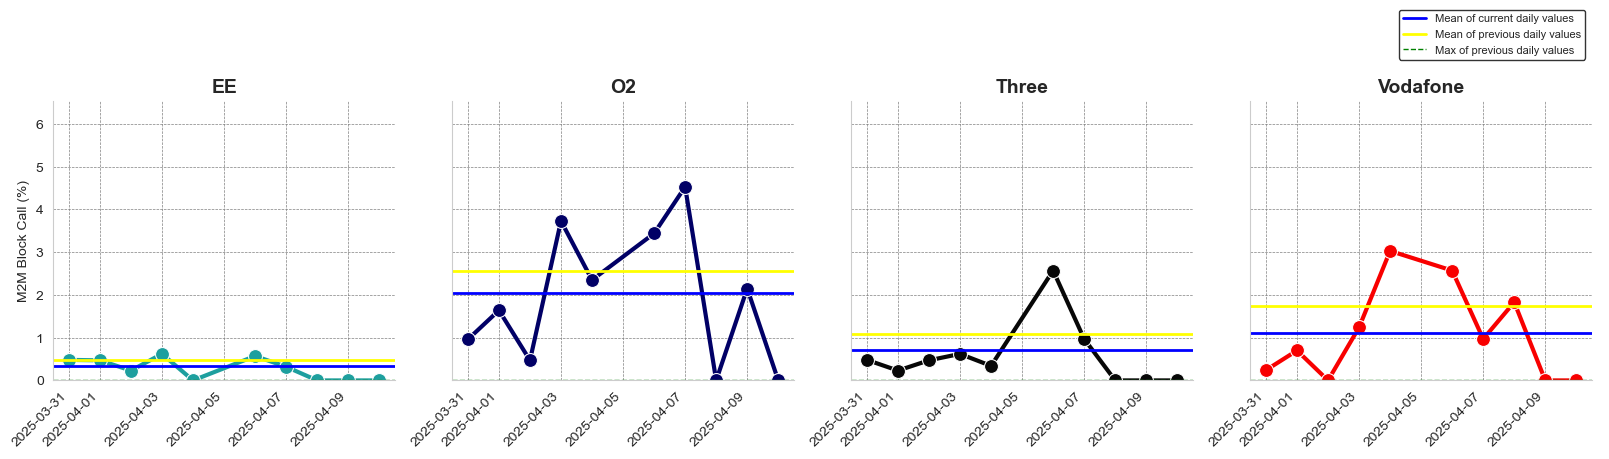

In [28]:
# Prepare the data for the function call
mean_curr_vals = block_all_curr.groupby('carrier')['block_rate_curr'].mean().to_dict()
mean_comp_vals = block_all_comp.groupby('carrier')['block_rate_comp'].mean().to_dict()
max_vals = block_comp.groupby('carrier')['block_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=block_curr,
    y_col="block_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=max_vals,
    min_vals=None,
    # title="M2M Block Call",
    y_label="M2M Block Call (%)",
    save_path=os.path.join(graphs_folder,"block_graph.png")
)

Compute EOM table

In [29]:
curr_test = block_all_curr
comp_test = block_all_comp
on_column = 'carrier'
drop_columns = ['block_count_x', 'block_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'M2M Blocked Call (%)'
curr_col = 'block_rate_curr'
comp_col = 'block_rate_comp'

# Process the data
block_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
block_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,M2M Blocked Call (%),EE,0.34,0.47,-0.13,-27.66
1,M2M Blocked Call (%),O2,2.05,2.56,-0.51,-19.92
2,M2M Blocked Call (%),Three,0.72,1.09,-0.37,-33.94
3,M2M Blocked Call (%),Vodafone,1.10,1.75,-0.65,-37.14


                                         Mobile-to-Mobile Call Drop

In [30]:
call_data_curr['blocked_call'] = 0
mask =(call_data_curr['flag_access_success'] == False)
call_data_curr.loc[mask, 'blocked_call'] = 1

call_data_curr['dropped_call'] = 0
mask = (call_data_curr['flag_task_success'] == False)
call_data_curr.loc[mask, 'dropped_call'] = 1

call_data_curr['incomplete_call'] = 0
mask = (call_data_curr['flag_access_success'] == True) & \
       (call_data_curr['flag_task_success'] == None)
call_data_curr.loc[mask, 'incomplete_call'] = 1

# filter curr
filtered_call_drop_curr = (
    call_data_curr['dropped_call'] == 1
)

filtered_call_not_block_curr = (
    call_data_curr['blocked_call'] != 1
)

filtered_call_not_incomplete_curr = (
    call_data_curr['incomplete_call'] != 1
)

#comparison data
call_data_comp['blocked_call'] = 0
mask =(call_data_comp['flag_access_success'] == False)
call_data_comp.loc[mask, 'blocked_call'] = 1


call_data_comp['dropped_call'] = 0
mask = (call_data_comp['flag_task_success'] == False)
call_data_comp.loc[mask, 'dropped_call'] = 1

call_data_comp['incomplete_call'] = 0
mask = (call_data_comp['flag_access_success'] == True) & \
       (call_data_comp['flag_task_success'] == None)
call_data_comp.loc[mask, 'incomplete_call'] = 1

# filter comp
filtered_call_drop_comp = (
    call_data_comp['dropped_call'] == 1
)

filtered_call_not_block_comp = (
    call_data_comp['blocked_call'] != 1
)

filtered_call_not_incomplete_comp = (
    call_data_comp['incomplete_call'] != 1
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/59817202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['blocked_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/59817202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['dropped_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/59817202.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Current:

In [31]:
drop_1 = (
    call_data_curr[filtered_call_drop_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_2 = (
    call_data_curr[filtered_call_not_block_curr & filtered_call_not_incomplete_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_curr = pd.merge(drop_1, drop_2, on=['carrier', 'start_date'], how='right').fillna(0)

drop_curr['drop_pct'] = round((drop_curr['drop_count'] / drop_curr['total_tests']) * 100, 2)

drop_curr = drop_curr[['carrier', 'start_date', 'drop_count', 'total_tests', 'drop_pct']]

# drop_curr.head()

Comparison:

In [32]:
drop_3 = (
    call_data_comp[filtered_call_drop_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_4 = (
    call_data_comp[filtered_call_not_block_comp & filtered_call_not_incomplete_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_comp = pd.merge(drop_3, drop_4, on=['carrier', 'start_date'], how='right').fillna(0)

drop_comp['drop_pct'] = round((drop_comp['drop_count'] / drop_comp['total_tests']) * 100, 2)

drop_comp = drop_comp[['carrier', 'start_date', 'drop_count', 'total_tests', 'drop_pct']]

# drop_comp.head()

 M2M drop Rate Comparison market Overall

Current:

In [33]:
drop_5 = (
    call_data_curr[filtered_call_drop_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_6 = (
    call_data_curr[filtered_call_not_block_curr & filtered_call_not_incomplete_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_all_curr = pd.merge(drop_5, drop_6, on=['carrier'], how='right').fillna(0)

drop_all_curr['drop_rate_curr'] = round((drop_all_curr['drop_count'] / drop_all_curr['total_tests']) * 100, 2)

# Reorder the columns
drop_all_curr = drop_all_curr[['carrier', 'drop_count', 'total_tests', 'drop_rate_curr']]

# drop_all_curr.head()

Comparison

In [34]:
drop_7 = (
    call_data_comp[filtered_call_drop_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_8 = (
    call_data_comp[filtered_call_not_block_comp & filtered_call_not_incomplete_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_all_comp = pd.merge(drop_7, drop_8, on=['carrier'], how='right').fillna(0)

drop_all_comp['drop_rate_comp'] = round((drop_all_comp['drop_count'] / drop_all_comp['total_tests']) * 100, 2)

# Reorder the columns
drop_all_comp = drop_all_comp[['carrier', 'drop_count', 'total_tests', 'drop_rate_comp']]

# drop_all_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


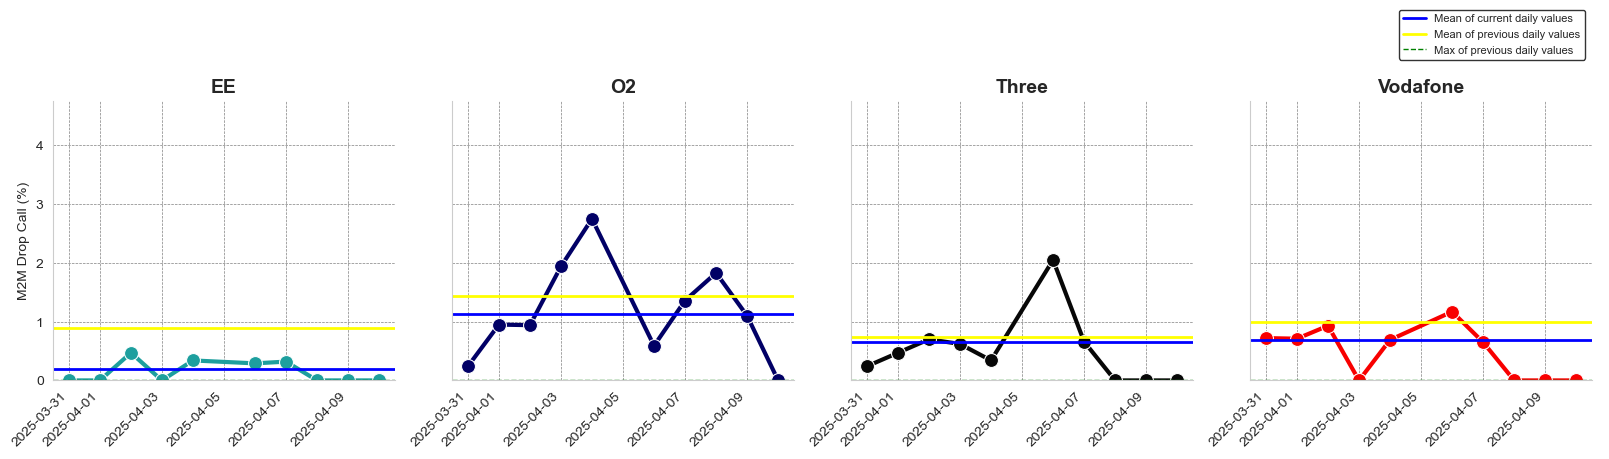

In [35]:
# Prepare the data for the function call
mean_curr_vals = drop_all_curr.groupby('carrier')['drop_rate_curr'].mean().to_dict()
mean_comp_vals = drop_all_comp.groupby('carrier')['drop_rate_comp'].mean().to_dict()
max_vals = drop_comp.groupby('carrier')['drop_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=drop_curr,
    y_col="drop_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=max_vals,
    min_vals=None,
    # title="M2M Drop Call",
    y_label="M2M Drop Call (%)",
    save_path=os.path.join(graphs_folder,"drop_graph.png")
)

Compute EOM table

In [36]:
curr_test = drop_all_curr
comp_test = drop_all_comp
on_column = 'carrier'
drop_columns = ['drop_count_x', 'drop_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'M2M Droped Call (%)'
curr_col = 'drop_rate_curr'
comp_col = 'drop_rate_comp'

# Process the data
drop_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
drop_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,M2M Droped Call (%),EE,0.19,0.90,-0.71,-78.89
1,M2M Droped Call (%),O2,1.13,1.43,-0.30,-20.98
2,M2M Droped Call (%),Three,0.65,0.74,-0.09,-12.16
3,M2M Droped Call (%),Vodafone,0.69,0.99,-0.30,-30.30


                                        Download Throughput

In [37]:
##Current
# Filter rows
filtered_dl_tput_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]

# Convert to date
filtered_dl_tput_curr['start_date'] = pd.to_datetime(filtered_dl_tput_curr['local_time']).dt.date

# Convert download speed to Mbps (kbit/s ÷ 1000)
filtered_dl_tput_curr['download_mbps'] = filtered_dl_tput_curr['dsd_effective_download_test_speed'] / 1000

##Comparison:
# Filter rows
filtered_dl_tput_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]

# Convert to date
filtered_dl_tput_comp['start_date'] = pd.to_datetime(filtered_dl_tput_comp['local_time']).dt.date

# Convert download speed to Mbps (kbit/s ÷ 1000)
filtered_dl_tput_comp['download_mbps'] = filtered_dl_tput_comp['dsd_effective_download_test_speed'] / 1000

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/1413940453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_tput_curr['start_date'] = pd.to_datetime(filtered_dl_tput_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/1413940453.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_tput_curr['download_mbps'] = filtered_dl_tput_curr['dsd_effective_download_test_speed'] / 1000
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ip

Current:

In [38]:
dl_tput_curr = (
    filtered_dl_tput_curr
    .groupby(['carrier', 'start_date'], as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'median_dl_tput_curr'})
)

dl_tput_curr['median_dl_tput_curr'] = dl_tput_curr['median_dl_tput_curr'].round(2)

# dl_tput_curr.head()

Comparison

In [39]:
dl_tput_comp = (
    filtered_dl_tput_comp
    .groupby(['carrier', 'start_date'], as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'median_dl_tput_comp'})
)

dl_tput_comp['median_dl_tput_comp'] = dl_tput_comp['median_dl_tput_comp'].round(2)

# dl_tput_comp.head()

Current:

In [40]:
dl_tput_all_curr = (
    filtered_dl_tput_curr
    .groupby('carrier', as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'dl_tput_curr_line'})
)

dl_tput_all_curr['dl_tput_curr_line'] = dl_tput_all_curr['dl_tput_curr_line'].round(2)

# dl_tput_all_curr.head()

Comparison:

In [41]:
dl_tput_all_comp = (
    filtered_dl_tput_comp
    .groupby('carrier', as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'dl_tput_comp_line'})
)

dl_tput_all_comp['dl_tput_comp_line'] = dl_tput_all_comp['dl_tput_comp_line'].round(2)

# dl_tput_all_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


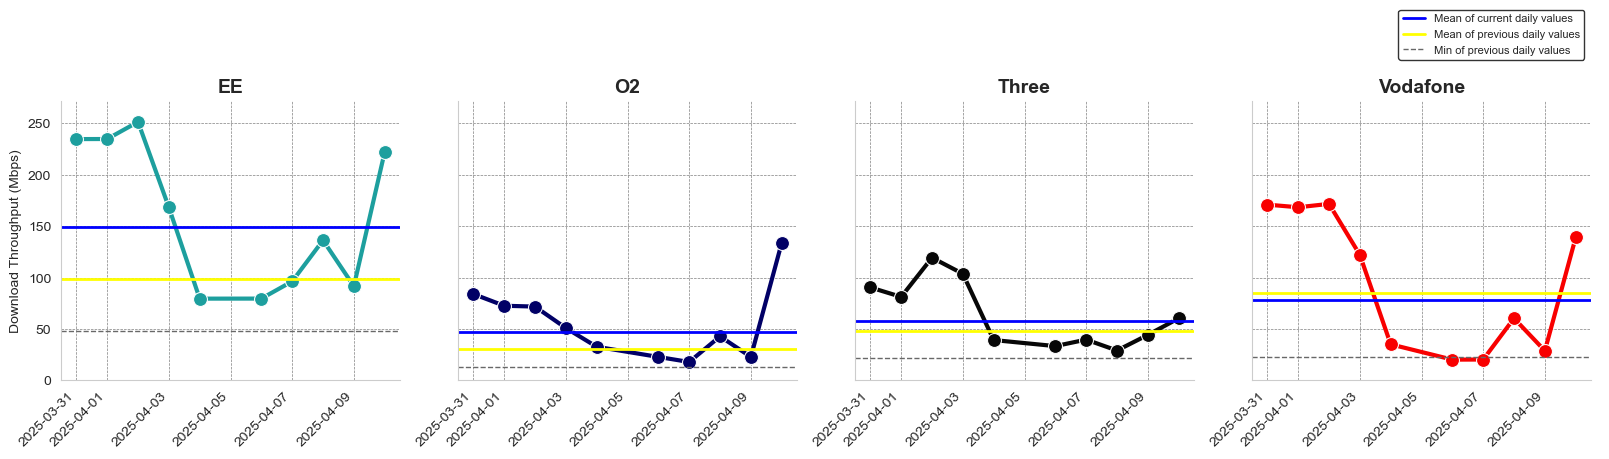

In [42]:
# Prepare the data for the function call
mean_curr_vals = dl_tput_all_curr.groupby('carrier')['dl_tput_curr_line'].mean().to_dict()
mean_comp_vals = dl_tput_all_comp.groupby('carrier')['dl_tput_comp_line'].mean().to_dict()
min_vals = dl_tput_comp.groupby('carrier')['median_dl_tput_comp'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_tput_curr,
    y_col="median_dl_tput_curr",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    y_label="Download Throughput (Mbps)",
    save_path=os.path.join(graphs_folder,"dl_tput_graph.png")
)

compute EOM table

In [43]:
curr_test = dl_tput_all_curr
comp_test = dl_tput_all_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Throughput (Mbps)'
curr_col = 'dl_tput_curr_line'
comp_col = 'dl_tput_comp_line'

# Process the data
dl_tput = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_tput.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Throughput (Mbps),EE,149.69,98.81,50.88,51.49
1,DL Throughput (Mbps),O2,47.22,30.57,16.65,54.47
2,DL Throughput (Mbps),Three,58.00,47.76,10.24,21.44
3,DL Throughput (Mbps),Vodafone,78.67,85.37,-6.70,-7.85


                                    Upload Throughput

In [44]:
filtered_ul_tput_curr = df_ts_curr[df_ts_curr['test_type_id'] == 19]
filtered_ul_tput_curr['start_date'] = pd.to_datetime(filtered_ul_tput_curr['local_time']).dt.date
filtered_ul_tput_curr['upload_mbps'] = filtered_ul_tput_curr['dsu_effective_upload_test_speed'] / 1000

filtered_ul_tput_comp = df_ts_comp[df_ts_comp['test_type_id'] == 19]
filtered_ul_tput_comp['start_date'] = pd.to_datetime(filtered_ul_tput_comp['local_time']).dt.date
filtered_ul_tput_comp['upload_mbps'] = filtered_ul_tput_comp['dsu_effective_upload_test_speed'] / 1000

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2908335583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ul_tput_curr['start_date'] = pd.to_datetime(filtered_ul_tput_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2908335583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ul_tput_curr['upload_mbps'] = filtered_ul_tput_curr['dsu_effective_upload_test_speed'] / 1000
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipyker

Current:

In [45]:
ul_tput_curr = (
    filtered_ul_tput_curr
    .groupby(['carrier', 'start_date'], as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'median_ul_tput_curr'})
)
ul_tput_curr['median_ul_tput_curr'] = ul_tput_curr['median_ul_tput_curr'].round(2)

# ul_tput_curr.head()

Comparison:

In [46]:
ul_tput_comp = (
    filtered_ul_tput_comp
    .groupby(['carrier', 'start_date'], as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'median_ul_tput_comp'})
)
ul_tput_comp['median_ul_tput_comp'] = ul_tput_comp['median_ul_tput_comp'].round(2)

# ul_tput_comp.head()

Overall

Current:

In [47]:
ul_tput_all_curr = (
    filtered_ul_tput_curr
    .groupby('carrier', as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'ul_tput_curr_line'})
)
ul_tput_all_curr['ul_tput_curr_line'] = ul_tput_all_curr['ul_tput_curr_line'].round(2)

# ul_tput_all_curr.head()

Comparison:

In [48]:
ul_tput_all_comp = (
    filtered_ul_tput_comp
    .groupby('carrier', as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'ul_tput_comp_line'})
)
ul_tput_all_comp['ul_tput_comp_line'] = ul_tput_all_comp['ul_tput_comp_line'].round(2)

# ul_tput_all_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


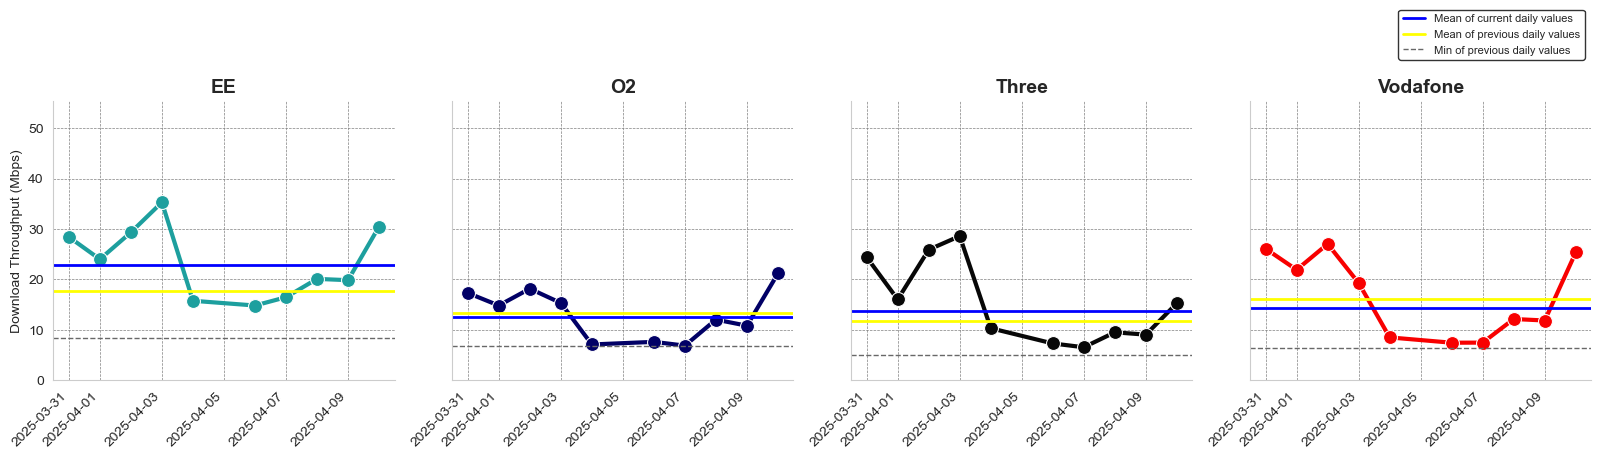

In [49]:
# Prepare the data for the function call
mean_curr_vals = ul_tput_all_curr.groupby('carrier')['ul_tput_curr_line'].mean().to_dict()
mean_comp_vals = ul_tput_all_comp.groupby('carrier')['ul_tput_comp_line'].mean().to_dict()
min_vals = ul_tput_comp.groupby('carrier')['median_ul_tput_comp'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=ul_tput_curr,
    y_col="median_ul_tput_curr",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    y_label="Download Throughput (Mbps)",
    save_path=os.path.join(graphs_folder,"ul_tput_graph.png")
)

compute EOM table

In [50]:
curr_test = ul_tput_all_curr
comp_test = ul_tput_all_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'UL Throughput (Mbps)'
curr_col = 'ul_tput_curr_line'
comp_col = 'ul_tput_comp_line'

# Process the data
ul_tput = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
ul_tput.head()

,measure,carrier,current,comparison,delta,pct_change
0,UL Throughput (Mbps),EE,22.87,17.64,5.23,29.65
1,UL Throughput (Mbps),O2,12.59,13.29,-0.70,-5.27
2,UL Throughput (Mbps),Three,13.80,11.81,1.99,16.85
3,UL Throughput (Mbps),Vodafone,14.35,16.21,-1.86,-11.47


                                  Download Access Success

In [51]:
filtered_dl_acc_succ_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
filtered_dl_acc_succ_curr['start_date'] = pd.to_datetime(filtered_dl_acc_succ_curr['local_time']).dt.date
filtered_dl_acc_succ_curr['percentage_access_success'] = filtered_dl_acc_succ_curr['percentage_access_success'] * 100


filtered_dl_acc_succ_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]
filtered_dl_acc_succ_comp['start_date'] = pd.to_datetime(filtered_dl_acc_succ_comp['local_time']).dt.date
filtered_dl_acc_succ_comp['percentage_access_success'] = filtered_dl_acc_succ_comp['percentage_access_success'] * 100

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/3522016850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_acc_succ_curr['start_date'] = pd.to_datetime(filtered_dl_acc_succ_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/3522016850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_acc_succ_curr['percentage_access_success'] = filtered_dl_acc_succ_curr['percentage_access_success'] * 100
/var/folders/bp/rq20yws14k3dmzd9

In [52]:
dl_acc_curr = (
    filtered_dl_acc_succ_curr
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc'})
)

dl_acc_curr['avg_dl_acc'] = dl_acc_curr['avg_dl_acc'].round(2)

# dl_acc_curr.head()

In [53]:
dl_acc_comp = (
    filtered_dl_acc_succ_comp
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc'})
)

dl_acc_comp['avg_dl_acc'] = dl_acc_comp['avg_dl_acc'].round(2)

# dl_acc_comp.head()

ALL

Current

In [54]:
dl_all_acc_curr = (
    filtered_dl_acc_succ_curr
    .groupby('carrier', as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc_curr'})
)

dl_all_acc_curr['avg_dl_acc_curr'] = dl_all_acc_curr['avg_dl_acc_curr'].round(2)

# dl_all_acc_curr.head()

Comparison:

In [55]:
dl_all_acc_comp = (
    filtered_dl_acc_succ_comp
    .groupby('carrier', as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc_comp'})
)

dl_all_acc_comp['avg_dl_acc_comp'] = dl_all_acc_comp['avg_dl_acc_comp'].round(2)

# dl_all_acc_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


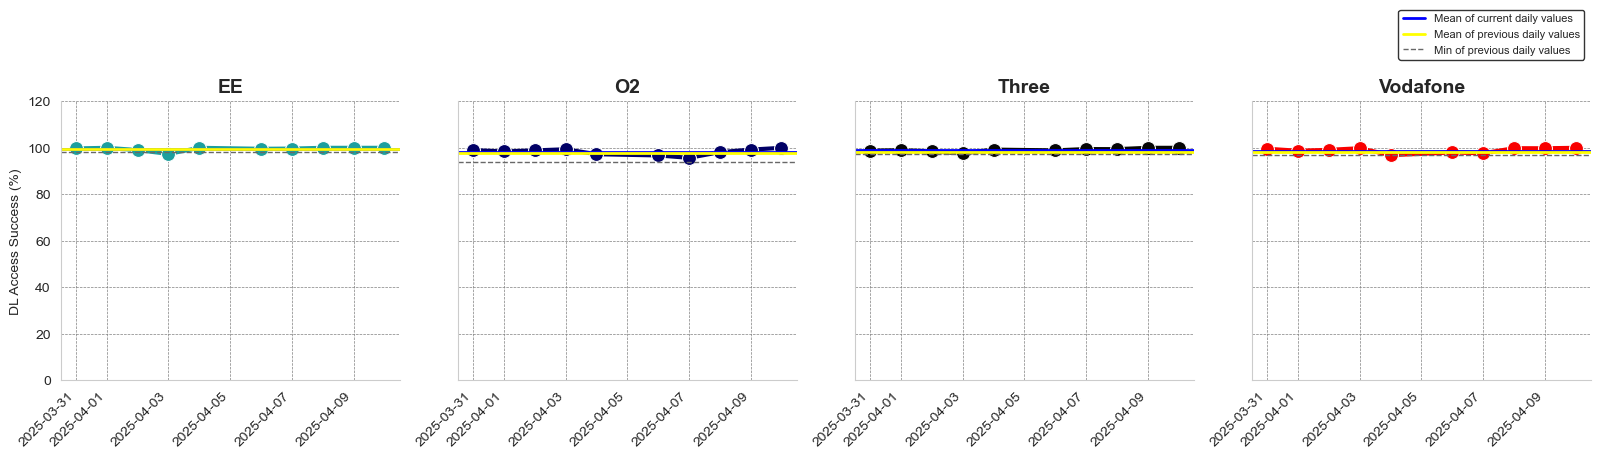

In [56]:
# Prepare the data for the function call
mean_curr_vals = dl_all_acc_curr.groupby('carrier')['avg_dl_acc_curr'].mean().to_dict()
mean_comp_vals = dl_all_acc_comp.groupby('carrier')['avg_dl_acc_comp'].mean().to_dict()
min_vals = dl_acc_comp.groupby('carrier')['avg_dl_acc'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_acc_curr,
    y_col="avg_dl_acc",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    y_label="DL Access Success (%)",
    save_path=os.path.join(graphs_folder, "dl_acc_graph.png")
)

compute EOM table

In [57]:
curr_test = dl_all_acc_curr
comp_test = dl_all_acc_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Access Success (%)'
curr_col = 'avg_dl_acc_curr'
comp_col = 'avg_dl_acc_comp'

# Process the data
dl_acc_curr= process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_acc_curr.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Access Success (%),EE,99.54,99.59,-0.05,-0.05
1,DL Access Success (%),O2,98.02,97.80,0.22,0.22
2,DL Access Success (%),Three,98.93,98.29,0.64,0.65
3,DL Access Success (%),Vodafone,98.67,98.20,0.47,0.48


                                Download Task Success

In [58]:
filtered_dl_task_succ_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
filtered_dl_task_succ_curr['start_date'] = pd.to_datetime(filtered_dl_task_succ_curr['local_time']).dt.date
filtered_dl_task_succ_curr['percentage_task_success'] = filtered_dl_task_succ_curr['percentage_task_success'] * 100


filtered_dl_task_succ_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]
filtered_dl_task_succ_comp['start_date'] = pd.to_datetime(filtered_dl_task_succ_comp['local_time']).dt.date
filtered_dl_task_succ_comp['percentage_task_success'] = filtered_dl_task_succ_comp['percentage_task_success'] * 100

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2313656264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_task_succ_curr['start_date'] = pd.to_datetime(filtered_dl_task_succ_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_17314/2313656264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_task_succ_curr['percentage_task_success'] = filtered_dl_task_succ_curr['percentage_task_success'] * 100
/var/folders/bp/rq20yws14k3dmzd9

In [59]:
dl_task_curr = (
    filtered_dl_task_succ_curr
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task'})
)

dl_task_curr['avg_dl_task'] = dl_task_curr['avg_dl_task'].round(2)

# dl_task_curr.head()

In [60]:
dl_task_comp = (
    filtered_dl_task_succ_comp
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task'})
)

dl_task_comp['avg_dl_task'] = dl_task_comp['avg_dl_task'].round(2)

# dl_task_comp.head()

 ALL

In [61]:
dl_all_task_curr = (
    filtered_dl_task_succ_curr
    .groupby('carrier', as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task_curr'})
)

dl_all_task_curr['avg_dl_task_curr'] = dl_all_task_curr['avg_dl_task_curr'].round(2)

# dl_all_task_curr.head()

In [62]:
dl_all_task_comp = (
    filtered_dl_task_succ_comp
    .groupby('carrier', as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task_comp'})
)

dl_all_task_comp['avg_dl_task_comp'] = dl_all_task_comp['avg_dl_task_comp'].round(2)

# dl_all_task_comp.head()

PLOT

/Users/jennymassari/Developer/projects/dq_reporting_test.py/reporting_plots.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


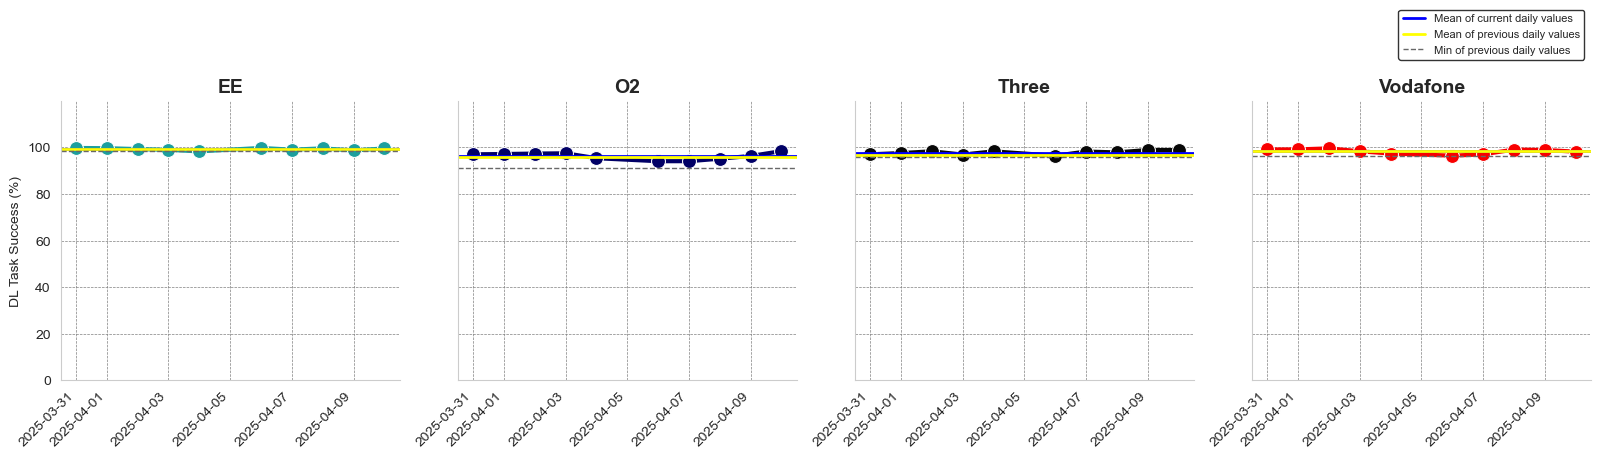

In [63]:
# Prepare the data for the function call
mean_curr_vals = dl_all_task_curr.groupby('carrier')['avg_dl_task_curr'].mean().to_dict()
mean_comp_vals = dl_all_task_comp.groupby('carrier')['avg_dl_task_comp'].mean().to_dict()
min_vals = dl_task_comp.groupby('carrier')['avg_dl_task'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_task_curr,
    y_col="avg_dl_task",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    y_label="DL Task Success (%)",
    save_path=os.path.join(graphs_folder, "dl_task_graph.png")
)

compute EOM table

In [64]:
curr_test = dl_all_task_curr
comp_test = dl_all_task_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Task Success (%)'
curr_col = 'avg_dl_task_curr'
comp_col = 'avg_dl_task_comp'

# Process the data
dl_task_curr = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_task_curr.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Task Success (%),EE,99.29,99.17,0.12,0.12
1,DL Task Success (%),O2,96.10,95.81,0.29,0.30
2,DL Task Success (%),Three,97.62,96.75,0.87,0.90
3,DL Task Success (%),Vodafone,98.30,98.38,-0.08,-0.08


DQ Test Counts

In [65]:
print("DQ Test Counts: ")

df_test_count.columns = df_test_count.iloc[0]
df_test_count = df_test_count.drop(0)

df_test_count = df_test_count.reset_index(drop=True)

df_test_count.head(len(df_test_count))



DQ Test Counts: 


,00,-------- DQ Test Counts --------,,,,
0,01,London-UK_2025-1H (CSID: 12854),,,,
1,02,,,,,
2,03,*****Total Test Count*****,Reportable,Valid,Invalid,Excluded Data
3,04,,93069,94592,3,1523
4,05,,,,,
5,06,*****Report Set*****,Reportable,Valid,Invalid,Excluded Data
6,07,EE,23279,23652,1,373
7,07,O2,23269,23649,0,380
8,07,Three,23269,23640,2,371
9,07,Vodafone,23252,23651,0,399


Fetching info need for the dq html title

In [66]:
def get_title_info_curr(curr_csid):
    title_test_count_info = f'''select 
    collection_set_id,
    collection_set,
    collection_type
    from md2.vi_collection_sets
    where collection_set_id = {curr_csid} 
    '''

    market_info_curr = pd.read_sql(title_test_count_info, con=os.getenv('RSR_SVC_CONN'))
    
    return market_info_curr

market_info_curr = get_title_info_curr(curr_csid)
collection_set_curr = market_info_curr.iloc[0]['collection_set']

# market_info_curr.head()


def get_title_info_comp(comp_csid):
    title_test_count_info = f'''select 
    collection_set_id,
    collection_set,
    collection_type
    from md2.vi_collection_sets
    where collection_set_id = {comp_csid} 
    '''

    market_info_comp = pd.read_sql(title_test_count_info, con=os.getenv('RSR_SVC_CONN'))
    
    return market_info_comp

market_info_comp = get_title_info_comp(comp_csid)
collection_set_comp = market_info_comp.iloc[0]['collection_set']

# market_info_comp.head()

# print({curr_csid})
# print({comp_csid})

In [ ]:
df_dl_5g_curr_html = df_dl_5g_curr.to_html(index=False, classes='table table-striped', border=0)
df_network_category_reshaped_html = df_network_category_reshaped.to_html(index=False, classes='table table-striped', border=0)
lte_rate_html  = lte_rate.to_html(index=False, classes='table table-striped', border=0)
volte_rate_html  = volte_rate.to_html(index=False, classes='table table-striped', border=0)
block_rate_html  = block_rate.to_html(index=False, classes='table table-striped', border=0)
drop_rate_html  = drop_rate.to_html(index=False, classes='table table-striped', border=0)
dl_tput_html  = dl_tput.to_html(index=False, classes='table table-striped', border=0)
ul_tput_html  = ul_tput.to_html(index=False, classes='table table-striped', border=0)
dl_acc_curr_html  = dl_acc_curr.to_html(index=False, classes='table table-striped', border=0)
dl_task_curr_html  = dl_task_curr.to_html(index=False, classes='table table-striped', border=0)
df_test_count_html = df_test_count.to_html(index=False, classes='table table-striped', border=0)

def send_email():
    # Path to the graphs folder
    graphs_folder = "graphs"

    # List of images in the order they appear in the HTML template
    image_files = [
        "dl_5g_network_category.png",
        "lte_graph.png",
        "volte_graph.png",
        "block_graph.png",
        "drop_graph.png",
        "dl_tput_graph.png",
        "ul_tput_graph.png",
        "dl_acc_graph.png",
        "dl_task_graph.png"
    ]

    # Generate Content-ID for each image
    image_cids = [f"image{i+1}" for i in range(len(image_files))]

    html_template = """
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <title>DQ Reporting</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
        <style>
            .section {
                font-weight: bold;
                border-radius: 5px;
                padding: 10px;
                margin-bottom: 100px;
                margin-top: 100px;
                }
            .text-center {
                text-align: center;
            }
            .table-container {
                text-align: center;
            }
            .table-container .table {
                margin: auto;
                width: 80%; 
            }
            .indented{
                margin-left: 200px;
                margin-right: 200px;
            }
            .btw-space {
                margin-top: 50px;
                margin-bottom: 50px;
            }
            table-border {
                border-collapse: collapse; /* Ensures borders don't double up */
                width: 100%; /* Optional: Makes the table span the full width */
            }
            th, td {
                border: 1px solid black; /* Adds a border to table cells */
                padding: 4px; /* Adds padding for better readability */
                text-align: center; /* Centers text in cells */
            }
            th {
                background-color: #f2f2f2; /* Optional: Adds a background color to headers */
            }
        </style>
    </head>
    <body class="p-4">
        <h1 class="mb-4 text-center section">{{ country }} Metro {{ collection_set_curr }} (CSID {{ curr_csid }}) DQ Review</h1>
        <h2 class="mb-4 text-center"> Comparison market: {{ country }} Metro {{ collection_set_comp }} (CSID {{ comp_csid }})</h1>
        <h2 class="text-center section">DL Network Category:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[0] }}" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ df_dl_5g_curr_html|safe }}</div>
        </div>
        <h2 class="text-center btw-space">Data Network Category (Download, Upload):</h2>
        <div class="table-container">
            <div class="table-responsive table-border th td">{{ df_network_category_reshaped_html|safe }}</div>
        </div>
        <h2 class="text-center section">Download Network Technology:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[1] }}" src="graphs/lte_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ lte_rate_html|safe }}</div>
        </div>
        <h2 class="text-center section">M2M VoLTE/VoNR/EPS Fallback:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[2] }}" src="graphs/volte_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ volte_rate_html|safe }}</div>
        </div>
        <h2 class="text-center section">Mobile-to-Mobile Call Block:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[3] }}" src="graphs/block_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ block_rate_html|safe }}</div>
        </div>
        <h2 class="text-center section">Mobile-to-Mobile Call Drop:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[4] }}" src="graphs/drop_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ drop_rate_html|safe }}</div>
        </div>
        <h2 class="text-center section">Download Throughput:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[5] }}" src="graphs/dl_tput_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ dl_tput_html|safe }}</div>
        </div>
        <h2 class="text-center section">Upload Throughput:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[6] }}" src="graphs/ul_tput_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ ul_tput_html|safe }}</div>
        </div>
        <h2 class="text-center section">Download Access Success:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[7] }}" src="graphs/dl_acc_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ dl_acc_curr_html|safe }}</div>
        </div>
        <h2 class="text-center section">Download Task Success:</h2>
        <div class="table-container">
            <img src="cid:{{ image_cids[8] }}" src="graphs/dl_task_graph.png" alt="Graph" class="img-fluid" style="max-width: 100%; height: auto;">
            <div class="table-responsive btw-space">{{ dl_task_curr_html|safe }}</div>
        </div>
        <div class="indented">
            <h3>Notable Insights:</h3>
            <ul>
                {% for insight in notable_insights %}
                {% if insight %}
                <li>{{ insight }}</li>
                {% else %}
                <li>No notable insights.</li>
                {% endif %}
                {% endfor %}
            </ul>
        </div>

        <div class="indented">
            <h3>Other Observations:</h3>
            <ul>
                {% for observation in other_observations %}
                {% if observation %}
                <li>{{ observation }}</li>
                {% else %}
                <li>No other observations.</li>
                {% endif %}
                {% endfor %}
            </ul>
        </div>

        <div class="indented">
            <h3>Data Exclusion/Tracking Items: </h3>
            <ul>
                {% for data_exclusion in data_exclusion %}
                {% if data_exclusion %}
                <li>{{ data_exclusion }}</li>
                {% else %}
                <li>No data exclusions or tracking items.</li>
                {% endif %}
                {% endfor %}
            </ul>
        </div>
        <h2 class="text-center section">DQ Test Count:</h2>
        <div class="table-container">
            <div class="table-responsive">{{ df_test_count_html|safe }}</div>
        </div>
        <h3 class="indented section">File Location: <a href="{{link_jira_ticket}}" target="_blank">RDAQ{{ last_five_chars }}</a></h3>
    </body>
    </html>
    """

    # Render 
    template = Template(html_template)
    rendered_html = template.render(
        country=country,
        curr_csid=curr_csid,
        collection_set_curr=collection_set_curr,
        comp_csid=comp_csid,
        collection_set_comp=collection_set_comp,
        image_cids=image_cids,
        df_dl_5g_curr_html = df_dl_5g_curr_html,
        df_network_category_reshaped_html = df_network_category_reshaped_html,
        lte_rate_html =lte_rate_html,
        volte_rate_html =volte_rate_html,
        block_rate_html =block_rate_html,
        drop_rate_html =drop_rate_html,
        dl_tput_html =dl_tput_html,
        ul_tput_html =ul_tput_html,
        dl_acc_curr_html =dl_acc_curr_html,
        dl_task_curr_html =dl_task_curr_html,
        df_test_count_html =df_test_count_html,
        link_jira_ticket=link_jira_ticket,
        last_five_chars=last_five_chars,
        notable_insights=notable_insights_list,
        other_observations=other_observations_list,
        data_exclusion=data_exclusion_list,
        )


# Reload the .env file
    load_dotenv(override=True)
# Email credentials and SMTP configuration
    email_user = os.getenv("SES_USER")  
    email_password = os.getenv("SES_PWD")  
    smtp_endpoint = "email-smtp.us-west-2.amazonaws.com"

    send_from = "jenny.massari@ookla.com"
    send_to = ["jenny.massari@ookla.com", 
               "rob.adair@ookla.com"]

    # Create the email message
    msg = MIMEMultipart("mixed")
    msg['From'] = send_from
    msg['To'] = ", ".join(send_to)
    msg['Subject'] = "DQ Report - Automated Email Test" 

    # Create the alternative part for plain text and HTML
    msg_alternative = MIMEMultipart("alternative")
    msg.attach(msg_alternative)

    # Add a text message before the reporting
    plain_text_message = """
    Hello everyone,

    If you're getting this email, it means the automation worked and you were somehow part of this process, yay! 
    
    Please send a thumbs up if you received the DQ report with the my message, plots and tables. 
    Crossing fingers..
    
    Thank you all so much for your help and support! :)

    P.S: It's not perfect yet, but it's getting there.

    Best,
    Jenny
    """

    msg.attach(MIMEText(plain_text_message, 'plain'))
    msg.attach(MIMEText(rendered_html, 'html'))

    # # Attach the rendered HTML as the email body
    # msg_alternative = MIMEMultipart("alternative")
    # msg.attach(msg_alternative)
    # msg_alternative.attach(MIMEText(rendered_html, 'html'))

     # Attach images in the order specified in the HTML template
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(graphs_folder, image_file)
        try:
            with open(image_path, "rb") as img:
                mime_image = MIMEImage(img.read())
                mime_image.add_header("Content-ID", f"<{image_cids[i]}>")  # Reference in HTML
                mime_image.add_header("Content-Disposition", "inline", filename=image_file)
                msg.attach(mime_image)
        except FileNotFoundError:
            print(f"Image file not found: {image_path}")

    try:
        # Connect to the SMTP server
        with smtplib.SMTP(smtp_endpoint, 587) as s:
            s.starttls()  
            s.login(email_user, email_password)  
            s.sendmail(send_from, send_to, msg.as_string())  
            print("Email sent successfully!")
    except Exception as e:
        print(f"Failed to send email: {e}")


# Call the function to send the email
    print(image_cids)
# send_email()


# print(f"HTML report saved to {html_file_path}")

In [68]:
# # Get path
# file_path = os.path.abspath("dq_reporting.html")  

# print(f"File path: {file_path}")
# print(f"File exists: {os.path.exists(file_path)}")

# if os.path.exists(file_path):
#     webbrowser.open(f"file://{file_path}")
# else:
#     print("Error: File not found.")
